In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

# Regular Expressions, Tokenization

---

## **Regular Expressions**:  
   A powerful tool for pattern matching in texts, widely used across programming languages and text-processing tools. It allows for searching and extracting specific patterns from text.

---

In [10]:
import re

# Sample text containing various patterns
text = """
The items cost $199.99 and $24.99 in total.
Please contact us at info@example.com or call (123) 456-7890.
Visit our website at https://www.example.com or http://example.org.
The meeting is on 2024-10-05, and the second meeting is on 05/10/2024.
"""

# 1. Regular expression to match prices (with optional decimals)
price_pattern = r"\$\d+(?:\.\d{2})?"
prices = re.findall(price_pattern, text)

# 2. Regular expression to match email addresses
email_pattern = r"\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b"
emails = re.findall(email_pattern, text)

# 3. Regular expression to match phone numbers (US format)
phone_pattern = r"\(\d{3}\) \d{3}-\d{4}"
phone_numbers = re.findall(phone_pattern, text)

# 4. Regular expression to match URLs (http and https)
url_pattern = r"http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+"
urls = re.findall(url_pattern, text)

# 5. Regular expression to match dates (various formats: YYYY-MM-DD, DD/MM/YYYY)
date_pattern = r"\b\d{4}-\d{2}-\d{2}\b|\b\d{2}/\d{2}/\d{4}\b"
dates = re.findall(date_pattern, text)

# Output matched patterns
print("Matched prices:", prices)
print("Matched emails:", emails)
print("Matched phone numbers:", phone_numbers)
print("Matched URLs:", urls)
print("Matched dates:", dates)


Matched prices: ['$199.99', '$24.99']
Matched emails: ['info@example.com']
Matched phone numbers: ['(123) 456-7890']
Matched URLs: ['https://www.example.com', 'http://example.org.']
Matched dates: ['2024-10-05', '05/10/2024']


## Explanation of Regular Expression Patterns:

1. **Price Pattern** (`\$\d+(?:\.\d{2})?`):
   - This pattern matches prices that start with the dollar sign (`$`), followed by one or more digits (`\d+`), optionally followed by a decimal point and exactly two digits (`\.\d{2}`). This pattern will capture prices like `$199`, `$24.99`, etc.
   
<br>

2. **Email Pattern** (`[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}`):
   - This pattern matches email addresses. The local part (before the `@`) can contain alphanumeric characters and special characters like `.`, `_`, `%`, `+`, or `-`. After the `@`, it expects a domain name made of alphanumeric characters, hyphens, and dots, followed by a top-level domain (like `.com` or `.org`) with at least two letters.

<br>
   
3. **Phone Number Pattern** (`\(\d{3}\) \d{3}-\d{4}`):
   - This pattern matches US phone numbers in the format `(123) 456-7890`. It expects an area code enclosed in parentheses, followed by a space, three digits, a hyphen, and four more digits.

<br>

4. **URL Pattern** (`http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+`):
   - This pattern matches URLs that start with `http` or `https`, followed by `://`, and then a valid sequence of URL characters. It includes alphanumeric characters, special characters like `-`, `_`, `.`, and others, allowing for complex web addresses.

<br>

5. **Date Pattern** (`\b\d{4}-\d{2}-\d{2}\b|\b\d{2}/\d{2}/\d{4}\b`):
   - This pattern matches two common date formats. It matches dates in the format `YYYY-MM-DD` (e.g., `2024-10-05`) or `DD/MM/YYYY` (e.g., `05/10/2024`). The `\b` ensures word boundaries so that the pattern is not part of a larger string.

---
These patterns can be used to identify and extract specific types of data like prices, emails, phone numbers, URLs, and dates from a given text.


## **Text Normalization**:  
   The process of transforming text into a standard format. This includes:
   - **Tokenization**: Splitting text into individual words or tokens.
   - **Lemmatization**: Reducing words to their base forms (e.g., "sang", "sung", and "sings" are reduced to "sing").
   - **Stemming**: A simpler process than lemmatization, where only word suffixes are removed (e.g., "fishing" becomes "fish").
   - **Sentence Segmentation**: Breaking down text into individual sentences using punctuation like periods or question marks.

---

In [13]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer

# Download necessary data for nltk
nltk.download('punkt')  # Punkt tokenizer model, used for sentence and word tokenization
nltk.download('wordnet')  # WordNet lexical database, required for lemmatization

# Sample text
text = "The children are playing with toys in the park."

# Tokenization
tokens = word_tokenize(text)  # Tokenizes the input sentence into individual words

# Lemmatization
lemmatizer = WordNetLemmatizer()  # Initializes the lemmatizer object
# Lemmatize each word in the tokens list
# Lemmatization returns the base or dictionary form of the word (e.g., "fishermen" -> "fisherman")
lemmatized_words = [lemmatizer.lemmatize(token) for token in tokens]

# Stemming
stemmer = PorterStemmer()  # Initializes the stemmer object
# Stem each word in the tokens list
# Stemming reduces a word to its base form by removing affixes (e.g., "fishing" -> "fish")
stemmed_words = [stemmer.stem(token) for token in tokens]

# Output the results
print("Original Tokens:", tokens)  # Displays the original tokenized words
print("Lemmatized Words:", lemmatized_words)  # Displays the words after lemmatization
print("Stemmed Words:", stemmed_words)  # Displays the words after stemming


Original Tokens: ['The', 'children', 'are', 'playing', 'with', 'toys', 'in', 'the', 'park', '.']
Lemmatized Words: ['The', 'child', 'are', 'playing', 'with', 'toy', 'in', 'the', 'park', '.']
Stemmed Words: ['the', 'children', 'are', 'play', 'with', 'toy', 'in', 'the', 'park', '.']


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!



##  **Tokenization Challenges**:
   - Tokenizing English text is relatively simple because words are often separated by spaces. However, challenges arise with:
     - Multi-word expressions like "New York."
     - Handling contractions like "I’m" into "I" and "am."
     - Dealing with emoticons and hashtags in social media content.

---

In [14]:
import re

# Sample text containing multi-word expressions and contractions
text = "I’m going to New York next week."

# Regular expression for tokenizing
# Handles multi-word expressions like "New York" and contractions like "I’m"
pattern = r"\bNew York\b|I'm|I\s+am|\w+"

# Tokenize the text
tokens = re.findall(pattern, text)

print("Tokens:", tokens)


Tokens: ['I', 'm', 'going', 'to', 'New York', 'next', 'week']


# One-Hot Encoding

One-hot encoding is a process used to convert categorical data into a numerical format that machine learning models can work with. It is especially useful when dealing with categorical variables that do not have an inherent numerical order, such as colors, countries, or product categories.

### How It Works:
One-hot encoding transforms each unique category into a binary vector. Each vector is all zeros except for the position corresponding to the specific category, which is set to 1.

### Example:
Consider a categorical variable representing **Colors** with three possible values: `Red`, `Green`, and `Blue`.

1. **Original Categories**:
   - Red
   - Green
   - Blue

<br>


2. **One-Hot Encoding Representation**:

   - `Red`  → `[1, 0, 0]`
   - `Green`  → `[0, 1, 0]`
   - `Blue`  → `[0, 0, 1]`

### Key Points:
- Each category is represented as a unique vector.
- The number of binary vectors equals the number of unique categories.
- The vector length is the same as the number of categories, and only one bit is "hot" (1), while the rest are "cold" (0).

### Advantages:
- **Simple Representation**: Provides a clear and straightforward way to represent categorical data.
- **Model Compatibility**: Many machine learning algorithms require numerical inputs, so one-hot encoding helps convert categorical data into a usable format.
  
### Disadvantages:
- **High Dimensionality**: If the number of categories is large, the resulting one-hot encoded vectors can become very sparse and high-dimensional.
- **Redundancy**: Only one bit carries meaningful information, while the others are always zero, leading to inefficiency when many categories are present.


In [16]:
import pandas as pd

# Sample data
colors = ['Red', 'Green', 'Blue', 'Green', 'Red']

# Creating a DataFrame
df = pd.DataFrame({'Color': colors})

# Applying one-hot encoding with integers (0, 1)
one_hot_encoded_df = pd.get_dummies(df, columns=['Color'], dtype=int)
one_hot_encoded_df

,Color_Blue,Color_Green,Color_Red
0,0,0,1
1,0,1,0
2,1,0,0
3,0,1,0
4,0,0,1


# Data: BBC text

BBC text dta can be accessed via: https://storage.googleapis.com/dataset-uploader/bbc/bbc-text.csv

The data is consisted of 5 categories and 2,225 texts:

In [17]:
data = pd.read_csv('Data/bbc.csv')
data.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [18]:
data.category.unique()

array(['tech', 'business', 'sport', 'entertainment', 'politics'],
      dtype=object)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2225 non-null   object
 1   text      2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [20]:
data['category'].value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64

# Document-Term Matrix (DTM)

The **Document-Term Matrix (DTM)** is a fundamental representation in text mining and Natural Language Processing (NLP). It is used to represent documents as rows and words as columns, with the cells containing the frequency of the words in each document. This matrix provides a way to analyze the textual content in a structured, numerical format, which is crucial for various downstream tasks like text classification, clustering, or sentiment analysis.

## Structure of a DTM
A **DTM** is composed as follows:
- **Rows (Documents):** Each row in the matrix corresponds to a document from the corpus.
- **Columns (Terms):** Each column represents a unique word (or term) from the entire collection of documents.
- **Elements (Frequencies):** The values within the matrix indicate how many times a specific word appears in each document. This value can represent a simple count of occurrences or other metrics like Term Frequency-Inverse Document Frequency (TF-IDF).

## Example Data Set

Consider the following example data set:

| Index | Category      | Text                                                             |
|-------|---------------|------------------------------------------------------------------|
| 0     | Tech          | tv future in the hands of viewers with home theatre systems       |
| 1     | Business      | worldcom boss left books alone former worldcom accounting         |
| 2     | Sport         | tigers wary of farrell gamble leicester say gamble worth risk     |
| 3     | Sport         | yeading face newcastle in fa cup premiership showdown             |
| 4     | Entertainment | ocean s twelve raids box office ocean s twelve                   |

### Steps for Creating a Document-Term Matrix

1. **Text Preprocessing**  
   Before building a DTM, text data needs to be preprocessed. Preprocessing typically includes:
   - **Lowercasing:** Convert all the text to lowercase to avoid case-sensitivity issues.
   - **Tokenization:** Split each document into individual words (tokens).
   - **Removing Stop Words (Optional):** Removing common but irrelevant words like "the," "is," "in" may enhance focus on more meaningful terms.
   - **Text Normalization:** Lemmatization, Stemming, Sentence Segmentation, ... 

<br>
   
2. **Build the Vocabulary**  
   After preprocessing, create a vocabulary, which is a collection of all unique words from the corpus. This set of words will serve as the columns of the DTM. For instance, with the above data set, the vocabulary could include words like:
   - tv, future, hands, worldcom, boss, gamble, ocean, box, etc.

<br>

3. **Construct the Matrix**  
   The matrix is constructed by calculating how many times each word in the vocabulary appears in each document. The result is a sparse matrix where most of the values are zero, indicating that a word does not appear in a document. For example:

<br>

| Document/Word | tv | future | hands | worldcom | boss | gamble | fa | cup | ocean | box | office | ... |
|---------------|----|--------|-------|----------|------|--------|----|-----|-------|-----|--------|-----|
| **Doc 0**     |  1 |   1    |   1   |    0     |  0   |   0    |  0 |  0  |   0   |  0  |    0   | ... |
| **Doc 1**     |  0 |   0    |   0   |    2     |  1   |   0    |  0 |  0  |   0   |  0  |    0   | ... |
| **Doc 2**     |  0 |   0    |   0   |    0     |  0   |   2    |  0 |  0  |   0   |  0  |    0   | ... |
| **Doc 3**     |  0 |   0    |   0   |    0     |  0   |   0    |  1 |  1  |   0   |  0  |    0   | ... |
| **Doc 4**     |  0 |   0    |   0   |    0     |  0   |   0    |  0 |  0  |   2   |  1  |    1   | ... |

In this matrix:
- **Document 0 (Tech)** contains the words "tv," "future," and "hands," each appearing once, so the respective cells are filled with 1.
- **Document 1 (Business)** includes the word "worldcom," which appears twice, and "boss," which appears once.
- **Document 2 (Sport)** has the word "gamble" appearing twice, among others.

### Key Concepts in DTM Construction

- **Term Frequency (TF):** Represents the raw count of how many times a word occurs in a document. This is typically the base form of a DTM.
- **Inverse Document Frequency (IDF):** Adjusts the weight of terms based on their frequency across all documents, giving less importance to common words that appear in many documents. This is used in **TF-IDF** matrices.


In [21]:
import numpy as np

# Sample data - list of documents
docs = [
    "tv future in the hands of viewers with home theatre systems",
    "worldcom boss left books alone former worldcom accounting",
    "tigers wary of farrell gamble leicester say gamble worth risk",
    "yeading face newcastle in fa cup premiership showdown",
    "ocean s twelve raids box office ocean s twelve"
]

# Function to create a DTM
def create_dtm(documents):
    # Tokenizing each document into words and building the vocabulary
    vocabulary = sorted(set(word for doc in documents for word in doc.split()))
    dtm = np.zeros((len(documents), len(vocabulary)))
    
    # Populating the DTM with word counts
    for i, doc in enumerate(documents):
        words = doc.split()
        for word in words:
            if word in vocabulary:
                dtm[i][vocabulary.index(word)] += 1
    
    return dtm, vocabulary

# Create DTM
dtm, vocab = create_dtm(docs)
print("Document-Term Matrix:\n")
pd.DataFrame(dtm,columns = vocab)

Document-Term Matrix:



,accounting,alone,books,boss,box,cup,fa,face,farrell,former,...,theatre,tigers,tv,twelve,viewers,wary,with,worldcom,worth,yeading
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


# Measuring Document Similarity Using Document-Term Matrix (DTM)

When working with a collection of documents, the **Document-Term Matrix (DTM)** is a common representation that captures the frequency of words (terms) across documents. Each row of the DTM corresponds to a document, and each column represents a unique term (word). The value at each position $(i, j)$ in the matrix is the frequency count of the term $j$ in document $i$.

Once the DTM is constructed, the similarity between documents can be measured by comparing their corresponding vectors using various similarity measures.

## Common Similarity Measures

### 1. Cosine Similarity

Measures the cosine of the angle between two document vectors. It ranges from -1 (completely opposite) to 1 (identical), where:
- 1 means the vectors are identical or pointing in the same direction.
- -1 means the vectors are pointing in opposite directions.

The formula is:

$$
\text{Cosine Similarity}(A, B) = \frac{A \cdot B}{\|A\| \|B\|}
$$

Where:
- $A \cdot B$ is the dot product of two vectors.
- $\|A\|$ and $\|B\|$ are the magnitudes (norms) of the vectors.

### 2. Euclidean Distance

Measures the straight-line distance between two document vectors. Smaller distances indicate higher similarity.

$$
\text{Euclidean Distance}(A, B) = \sqrt{\sum_{i=1}^{n}(A_i - B_i)^2}
$$

### 3. Jaccard Similarity

Measures the similarity between two sets (or vectors) by dividing the size of their intersection by the size of their union. It ranges from 0 (completely dissimilar) to 1 (identical).

$$
\text{Jaccard Similarity}(A, B) = \frac{|A \cap B|}{|A \cup B|}
$$

---

In [24]:
# Cosine Similarity Function
def cosine_similarity(doc1, doc2):
    dot_product = np.dot(doc1, doc2)
    magnitude = np.linalg.norm(doc1) * np.linalg.norm(doc2)
    if magnitude == 0:
        return 0  # Avoid division by zero
    return dot_product / magnitude

# Euclidean Distance Function
def euclidean_distance(doc1, doc2):
    return np.sqrt(np.sum((doc1 - doc2) ** 2))

# Jaccard Similarity Function
def jaccard_similarity(doc1, doc2):
    intersection = np.minimum(doc1, doc2).sum()
    union = np.maximum(doc1, doc2).sum()
    if union == 0:
        return 0  # Avoid division by zero
    return intersection / union

doc1 = dtm[0]
doc1 = dtm[0]

print("\nCosine Similarity between Document 1 and 1:", cosine_similarity(doc1, doc1))
print("Euclidean Distance between Document 1 and 1:", euclidean_distance(doc1, doc1))
print("Jaccard Similarity between Document 1 and 1:", jaccard_similarity(doc1, doc1))



Cosine Similarity between Document 1 and 1: 1.0
Euclidean Distance between Document 1 and 1: 0.0
Jaccard Similarity between Document 1 and 1: 1.0


In [25]:
doc1 = dtm[0]
doc4 = dtm[3]

print("\nCosine Similarity between Document 1 and 4:", cosine_similarity(doc1, doc4))
print("Euclidean Distance between Document 1 and 4:", euclidean_distance(doc1, doc4))
print("Jaccard Similarity between Document 1 and 4:", jaccard_similarity(doc1, doc4))



Cosine Similarity between Document 1 and 4: 0.10660035817780521
Euclidean Distance between Document 1 and 4: 4.123105625617661
Jaccard Similarity between Document 1 and 4: 0.05555555555555555


# TF-IDF (Term Frequency-Inverse Document Frequency)

**TF-IDF** stands for **Term Frequency-Inverse Document Frequency**, a statistical measure used to evaluate how important a word is to a document in a collection or corpus. It is commonly used in text mining and information retrieval to reflect the significance of a word in a document relative to the entire corpus.

The core idea of TF-IDF is that:
- **Term Frequency (TF)** measures how frequently a word occurs in a document.
- **Inverse Document Frequency (IDF)** adjusts the weight of words by penalizing commonly used words and emphasizing rare or more distinctive terms across the corpus.

## Components of TF-IDF

### **Term Frequency (TF)**

The **Term Frequency** of a term $t$ in a document $d$ is calculated as the ratio of the number of times the term appears in the document to the total number of terms in the document:

$$
TF(t, d) = \frac{\text{Number of times term } t \text{ appears in document } d}{\text{Total number of terms in document } d}
$$

This value represents how important a term is within a specific document.

### **Inverse Document Frequency (IDF)**

The **Inverse Document Frequency** measures how important a term is across the entire corpus. It is defined as:

$$
IDF(t, D) = \log{\frac{N}{1 + \text{Number of documents containing term } t}}
$$

Where:
- $N$ is the total number of documents in the corpus.
- The logarithm is used to scale down the impact of terms that appear in many documents, preventing them from dominating the results.

Adding $1$ to the denominator ensures that terms appearing in all documents do not result in division by zero.

### **TF-IDF Calculation**

The TF-IDF value for a term $t$ in a document $d$ is calculated by multiplying the term frequency by the inverse document frequency:

$$
TF\text{-}IDF(t, d, D) = TF(t, d) \times IDF(t, D)
$$

This calculation adjusts the term frequency by the importance of the term across the entire corpus. Words that frequently appear in one document but are rare across other documents will have a higher TF-IDF score, signaling that they are more important for that document.

---

In [28]:
import math

# Sample documents
docs = [
    "tv future in the hands of viewers with home theatre systems",
    "worldcom boss left books alone former worldcom accounting",
    "tigers wary of farrell gamble leicester say gamble worth risk",
    "yeading face newcastle in fa cup premiership showdown",
    "ocean s twelve raids box office ocean s twelve"
]

# Step 1: Create the Vocabulary
def build_vocabulary(documents):
    vocabulary = []
    for doc in documents:
        words = doc.split()
        for word in words:
            if word not in vocabulary:
                vocabulary.append(word)
    return vocabulary

# Step 2: Calculate Term Frequency (TF)
def compute_tf(document, vocabulary):
    term_freq = {word: 0 for word in vocabulary}
    doc_words = document.split()
    for word in doc_words:
        term_freq[word] += 1
    # Normalize by total number of terms in the document
    doc_length = len(doc_words)
    tf = {}
    for word in vocabulary:
        tf[word] = term_freq[word] / doc_length
    return tf

# Step 3: Calculate Inverse Document Frequency (IDF)
def compute_idf(documents, vocabulary):
    N = len(documents)
    idf_values = {word: 0 for word in vocabulary}
    
    for doc in documents:
        doc_words = set(doc.split())  # Unique words in document
        for word in doc_words:
            if word in vocabulary:
                idf_values[word] += 1
                
    # Apply IDF formula and use log scaling
    idf = {}
    for word in vocabulary:
        idf[word] = math.log(N / (1 + idf_values[word]))
    return idf

# Step 4: Calculate TF-IDF
def compute_tf_idf(tf, idf):
    tf_idf = {}
    for word in tf:
        tf_idf[word] = tf[word] * idf[word]
    return tf_idf

# Step 5: Putting it all together
vocabulary = build_vocabulary(docs)

# Compute IDF for the entire corpus
idf_values = compute_idf(docs, vocabulary)

# Store TF-IDF values for each document in a DataFrame
tf_idf_df = pd.DataFrame(columns=vocabulary)

for i, doc in enumerate(docs):
    tf_values = compute_tf(doc, vocabulary)
    tf_idf_values = compute_tf_idf(tf_values, idf_values)
    
    # Store TF-IDF values in DataFrame
    tf_idf_df.loc[i] = [tf_idf_values[word] for word in vocabulary]

In [29]:
# Compute TF-IDF
tf_idf = np.array(tf_idf_df)
print("\nTF-IDF Matrix:\n")
tf_idf_df


TF-IDF Matrix:



,tv,future,in,the,hands,of,viewers,with,home,theatre,...,fa,cup,premiership,showdown,ocean,s,twelve,raids,box,office
0,0.083299,0.083299,0.046439,0.083299,0.083299,0.046439,0.083299,0.083299,0.083299,0.083299,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.051083,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
3,0.000000,0.000000,0.063853,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.114536,0.114536,0.114536,0.114536,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.20362,0.20362,0.20362,0.10181,0.10181,0.10181


In [30]:
doc1 = tf_idf[0]
doc4 = tf_idf[3]

print("\nCosine Similarity between Document 1 and 4:", cosine_similarity(doc1, doc4))
print("Euclidean Distance between Document 1 and 4:", euclidean_distance(doc1, doc4))
print("Jaccard Similarity between Document 1 and 4:", jaccard_similarity(doc1, doc4))


Cosine Similarity between Document 1 and 4: 0.03705721526816219
Euclidean Distance between Document 1 and 4: 0.3959022337520979
Jaccard Similarity between Document 1 and 4: 0.02794584550152837


# **Limitations of DTM and TF-IDF**

While DTM (and TF-IDF) provides a clear snapshot of the distribution of words across documents, it faces the following limitations:

- **Sparse Data**: Most documents do not contain all words in the vocabulary, which results in a sparse matrix (many zeros). This sparsity can make calculations inefficient and fail to capture important relationships between words.
  
- **Lack of Semantic Relationships**: DTM (and TF-IDF) focuses solely on word frequency and ignores the relationships between words. For example, **synonyms** like "automobile" and "car" are treated as completely different words, even though they carry similar meanings.

- **High Dimensionality**: As the vocabulary grows, the dimensionality of the DTM (and TF-IDF) increases, making it computationally expensive to work with. This is particularly problematic when processing large text corpora.


## **Next Step:**

To address these limitations, modern Natural Language Processing (NLP) shifts towards **vector semantics**, which represents words as points in a continuous vector space, also known as **word embeddings**. These vectors are learned from the distribution of words in a large corpus, capturing semantic relationships between words based on their context. This transition is grounded in the **distributional hypothesis**, which states that words occurring in similar contexts tend to have similar meanings.

---

# Vector Semantics and Embeddings

Vector semantics is the standard way to represent word meaning in NLP, helping model many aspects of word meaning through the distribution of neighboring words. This idea has its roots in the 1950s when two key concepts converged:

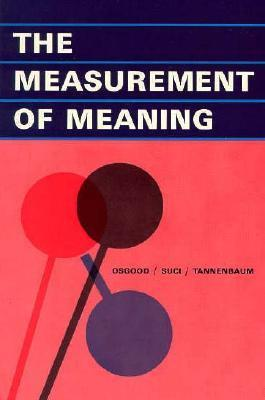

1. **Osgood's Idea (1957)**: He proposed representing word connotations as a point in a three-dimensional space.
2. **Distributional Hypothesis**: Linguists like Joos (1950), Harris (1954), and Firth (1957) suggested that the meaning of a word can be defined by its distribution in language use, particularly by the neighboring words or grammatical environments. Words that occur in similar contexts tend to have similar meanings.

## Example:
Imagine encountering the word `ongchoi` in contexts like the following:
- "Ongchoi is delicious sauteed with garlic."
- "Ongchoi is superb over rice."
- "...ongchoi leaves with salty sauces..."

By analyzing the neighboring words (`garlic`, `rice`, `salty`, `delicious`), and comparing them with other contexts (e.g., spinach, chard, collard greens), one can infer that `ongchoi` is likely a type of leafy green similar to those other vegetables.

## Vector Embeddings:
Vector semantics represents words as points in a multi-dimensional space, where similar words are close to each other. These vectors are called **embeddings**. The idea of "embedding" comes from the mathematical concept of mapping one space or structure into another. In NLP, embeddings can be sparse vectors (e.g., **tf-idf** or **DTM**) or dense vectors (e.g., **word2vec**).


# Latent Semantic Analysis using Singular Value Decomposition

Singular Value Decomposition (SVD) is a fundamental matrix decomposition technique in linear algebra. It allows us to decompose a complex matrix into three simpler matrices, making it easier to capture the essential structure of the data. SVD is widely used in areas like information retrieval, natural language processing (NLP), and image processing.

## Basic Concept of SVD


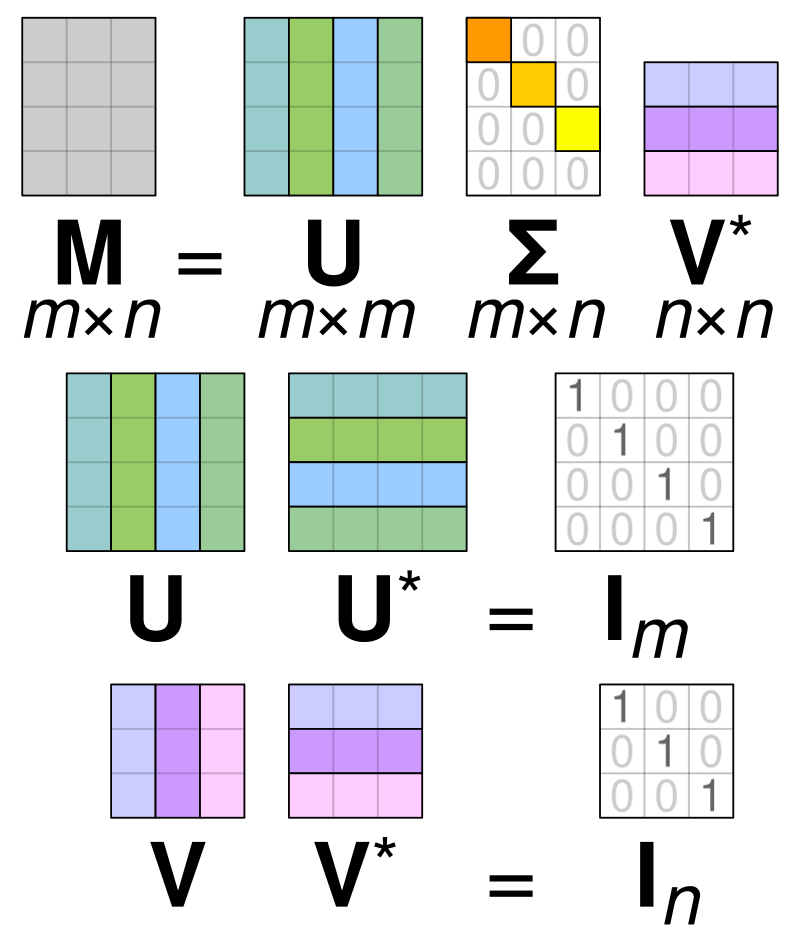


SVD decomposes a matrix $A$ into three matrices:

$$
A = U \Sigma V^T
$$

Where:
- $A$: An original matrix of size $m \times n$
- $U$: An $m \times m$ orthogonal matrix. 
- $\Sigma$: An $m \times n$ diagonal matrix containing the **singular values**. Singular values represent the importance of each component.
- $V^T$: An $n \times n$ orthogonal matrix.

An orthogonal matrix is a matrix whose identity matrix is the product of itself and its transposed matrix, or vice versa. A diagonal matrix is a matrix whose elements are zero everywhere except along the main diagonal.

## Components of SVD

1. **Singular Values ($\Sigma$)**:
   - $\Sigma$ is a diagonal matrix where the diagonal elements are the singular values of matrix $A$. Singular values capture the importance or magnitude of each dimension.
   - Larger singular values indicate more important dimensions, while smaller ones correspond to less significant components (often noise).
   
   <br>

2. **$U$ (Left Singular Vectors)**:
   - The matrix $U$ transforms the **rows** of matrix $A$ into a new feature space. Each row vector in $U$ represents a document's distribution in the new feature space.

   <br>

3. **$V^T$ (Right Singular Vectors)**:
   - The matrix $V^T$ transforms the **columns** of matrix $A$ into a new space.

In [33]:
import numpy as np

# Sample matrix A
A = np.array([[1, 0, 0], 
              [0, 1, 0], 
              [1, 1, 0], 
              [0, 0, 1]])

# Perform Singular Value Decomposition using NumPy
U, Sigma, Vt = np.linalg.svd(A, full_matrices=False)

# Sigma is returned as a 1D array, so we convert it to a diagonal matrix
Sigma_matrix = np.diag(Sigma)

# Print the resulting matrices
print("U matrix:\n", U)
print("\nSigma matrix:\n", Sigma_matrix)
print("\nVt matrix:\n", Vt)

# Reconstruct the original matrix by multiplying U, Sigma, and Vt
A_reconstructed = np.dot(U, np.dot(Sigma_matrix, Vt))

print("\nReconstructed matrix:\n", A_reconstructed)


U matrix:
 [[-4.08248290e-01  0.00000000e+00  7.07106781e-01]
 [-4.08248290e-01  0.00000000e+00 -7.07106781e-01]
 [-8.16496581e-01  0.00000000e+00 -5.55111512e-17]
 [ 0.00000000e+00 -1.00000000e+00  0.00000000e+00]]

Sigma matrix:
 [[1.73205081 0.         0.        ]
 [0.         1.         0.        ]
 [0.         0.         1.        ]]

Vt matrix:
 [[-0.70710678 -0.70710678 -0.        ]
 [-0.         -0.         -1.        ]
 [ 0.70710678 -0.70710678 -0.        ]]

Reconstructed matrix:
 [[ 1.00000000e+00 -1.11022302e-16  0.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00]
 [ 1.00000000e+00  1.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]


# Truncated SVD

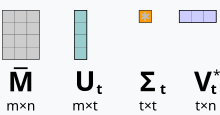

**Truncated SVD** is a dimensionality reduction technique based on Singular Value Decomposition (SVD). While the standard SVD decomposes a matrix into three matrices ($U$, $\Sigma$, and $V^T$), **truncated SVD** retains only the most important singular values and corresponding vectors, thus reducing the number of dimensions.

This method is particularly useful when working with large, sparse datasets, such as those in natural language processing or recommendation systems, as it improves computational efficiency and storage without significantly losing information.

## Mathematical Definition of Truncated SVD

Given a matrix $A$ of size $m \times n$, the standard SVD decomposes it as follows:

$$
A = U \Sigma V^T
$$

Where:
- $U$: an $m \times m$ orthogonal matrix.
- $\Sigma$: an $m \times n$ diagonal matrix of singular values.
- $V^T$: an $n \times n$ orthogonal matrix.

In **truncated SVD**, only the top $k$ largest singular values (and corresponding vectors from $U$ and $V^T$) are retained. Thus, truncated SVD is given by:

$$
A_k = U_k \Sigma_k V_k^T
$$

Where:
- $U_k$: the matrix formed by the first $k$ columns of $U$.
- $\Sigma_k$: the diagonal matrix formed by the first $k$ singular values.
- $V_k^T$: the matrix formed by the first $k$ rows of $V^T$.

Here, $k$ is a user-defined value that determines the number of dimensions to retain. Typically, $k$ is much smaller than the original dimensions of $A$, resulting in dimensionality reduction.


In [34]:
import numpy as np

# Sample matrix A
A = np.array([[1, 0, 0], 
              [0, 1, 0], 
              [1, 1, 0], 
              [0, 0, 1]])

# Perform full SVD using NumPy
U, Sigma, Vt = np.linalg.svd(A, full_matrices=False)

# Keep only the top 2 singular values for truncation
k = 2
U_k = U[:, :k]
Sigma_k = np.diag(Sigma[:k])
Vt_k = Vt[:k, :]

# Reconstruct the truncated matrix A_k
A_k = np.dot(U_k, np.dot(Sigma_k, Vt_k))

# Display the truncated matrix A_k
print("Truncated matrix A_k:\n", A_k)

Truncated matrix A_k:
 [[0.5 0.5 0. ]
 [0.5 0.5 0. ]
 [1.  1.  0. ]
 [0.  0.  1. ]]


# The Process of Latent Semantic Analysis (LSA)

Let’s assume that the input matrix $A$ (Word-Document Matrix $m \times n$) represents $n$ documents with $m$ words. After applying SVD to matrix $A$, we can decompose it into three matrices: $U$, $\Sigma$, and $V^T$. The number of non-zero singular values is $r$, and we select a smaller value $k < r$. From the matrices $U$ and $V$, we retain only the top $k$ singular values and construct reduced matrices $U_k$, $\Sigma_k$, and $V_k^T$ to approximate matrix $A$.

The approximation of $A$ is given by:

$$
A_k = U_k \Sigma_k V_k^T
$$

Next, by multiplying the transpose of $U_k$ to both sides of the equation, we obtain $X_1$:

$$
U_k^T A = U_k^T U_k \Sigma_k V_k^T = \Sigma_k V_k^T = X_1
$$

Here, $X_1$ represents the documents in the reduced $k$-dimensional space.

Similarly, by multiplying $V_k$ to both sides, we obtain $X_2$:

$$
A V_k = U_k \Sigma_k V_k^T V_k = U_k \Sigma_k = X_2
$$

Here, $X_2$ represents the words in the reduced $k$-dimensional space. 


In [36]:
import numpy as np

# Example Word-Document Matrix
A = np.array([[1, 0, 0], 
              [0, 1, 0], 
              [1, 1, 0], 
              [0, 0, 1]])

# Perform full SVD using NumPy
U, Sigma, Vt = np.linalg.svd(A, full_matrices=False)

# Truncate SVD (Keep only the top 2 singular values)
k = 2
U_k = U[:, :k]
Sigma_k = np.diag(Sigma[:k])
Vt_k = Vt[:k, :]

# Reconstruct the matrix A' using Truncated SVD
A_k = np.dot(U_k, np.dot(Sigma_k, Vt_k))

# Print the results
print("Original matrix A:\n", A)
print("\nTruncated matrix A_k:\n", A_k)

# Reduced document embeddings (X1)
X1 = np.dot(U_k.T, A)
print("\nDocument embeddings (X1):\n", X1)

# Reduced word embeddings (X2)
X2 = np.dot(A, Vt_k.T)
print("\nWord embeddings (X2):\n", X2)

Original matrix A:
 [[1 0 0]
 [0 1 0]
 [1 1 0]
 [0 0 1]]

Truncated matrix A_k:
 [[0.5 0.5 0. ]
 [0.5 0.5 0. ]
 [1.  1.  0. ]
 [0.  0.  1. ]]

Document embeddings (X1):
 [[-1.22474487 -1.22474487  0.        ]
 [ 0.          0.         -1.        ]]

Word embeddings (X2):
 [[-0.70710678  0.        ]
 [-0.70710678  0.        ]
 [-1.41421356  0.        ]
 [ 0.         -1.        ]]


# Practice with BBC data

In [55]:
# Create DataFrame
df = pd.DataFrame(data)

# Function to split text into sentences and create new rows
def split_sentences(df):
    new_rows = []

    for _, row in df.iterrows():
        # Split the 'text' column by sentence-ending punctuation (., !, ?)
        sentences = re.split(r'[.!?]+', row['text'])  # Split by punctuation
        sentences = [s.strip() for s in sentences if s.strip()]  # Remove empty strings and leading/trailing spaces

        # Create new rows with the same category for each sentence
        for sentence in sentences:
            new_rows.append({'category': row['category'], 'text': sentence})

    # Create a new DataFrame from the new rows
    return pd.DataFrame(new_rows)

# Apply the function to split sentences
expanded_df = split_sentences(df)

# Show the expanded DataFrame
expanded_df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,tech,that is according to an expert panel which gat...
2,tech,with the us leading the trend programmes and ...
3,tech,one of the most talked-about technologies of c...
4,tech,these set-top boxes like the us s tivo and th...


In [57]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import wordnet

# Ensure you have downloaded the required resources if not already done
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('averaged_perceptron_tagger')

# Function to check if a word is a noun
def is_noun(pos_tag):
    return pos_tag.startswith('NN')  # NN for singular, NNS for plural nouns

# Function to get wordnet POS tag
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

# Preprocessing: Tokenizing, removing punctuation, lowercasing, stopwords removal, and lemmatization
def tokenize_corpus(corpus):
    stop_words = set(stopwords.words('english'))  # Get stopwords
    lemmatizer = WordNetLemmatizer()  # Initialize lemmatizer
    
    processed_corpus = []
    
    for sentence in corpus:
        # Convert to lowercase
        sentence = sentence.lower()
        
        # Remove punctuation and non-alphabetic characters
        sentence = re.sub(r'[^a-z\s]', '', sentence)
        
        # Tokenize (split the sentence into words)
        words = sentence.split()
        
        # Remove stopwords
        filtered_words = [word for word in words if word not in stop_words]
        
        # POS tagging the filtered words
        pos_tags = pos_tag(filtered_words)
        
        # Keep only nouns and lemmatize them
        processed_sentence = [
            lemmatizer.lemmatize(word, get_wordnet_pos(pos)) 
            for word, pos in pos_tags if is_noun(pos)
        ]
        
        processed_corpus.append(processed_sentence)
    
    return processed_corpus

In [58]:
corpus = expanded_df['text']
tokenized_corpus = tokenize_corpus(corpus)

In [59]:
# Create DTM
tokenized_corpus
print("Document-Term Matrix:\n")
pd.DataFrame(dtm,columns = vocab)

AttributeError: 'list' object has no attribute 'split'

In [40]:
Word_Document = pd.DataFrame(dtm,columns = vocab).T
Word_Document

,0,1,2,3,4
accounting,0.0,1.0,0.0,0.0,0.0
alone,0.0,1.0,0.0,0.0,0.0
books,0.0,1.0,0.0,0.0,0.0
boss,0.0,1.0,0.0,0.0,0.0
box,0.0,0.0,0.0,0.0,1.0
cup,0.0,0.0,0.0,1.0,0.0
fa,0.0,0.0,0.0,1.0,0.0
face,0.0,0.0,0.0,1.0,0.0
farrell,0.0,0.0,1.0,0.0,0.0
former,0.0,1.0,0.0,0.0,0.0


In [42]:
# Step 1: Word - Document Matrix
X = Word_Document

# Step 2: Perform SVD (Singular Value Decomposition)
U, Sigma, Vt = np.linalg.svd(X, full_matrices=False)

# Truncate SVD (Keep only the top 2 singular values)
k = 2
U_k = U[:, :k]
Sigma_k = np.diag(Sigma[:k])
Vt_k = Vt[:k, :]

# Reconstruct the matrix A_k using Truncated SVD
A_k = np.dot(U_k, np.dot(Sigma_k, Vt_k))

# Step 3: Print the results
print("\nTruncated matrix A_k (Approximation of Term-Document Matrix):\n", A_k)


Truncated matrix A_k (Approximation of Term-Document Matrix):
 [[-3.02970757e-16  3.00845728e-31 -4.44675078e-16 -6.47189401e-17
   0.00000000e+00]
 [-3.62097611e-16  3.59557868e-31 -5.31456518e-16 -7.73492921e-17
   0.00000000e+00]
 [-3.52090525e-16  3.49620971e-31 -5.16768955e-16 -7.52116336e-17
   0.00000000e+00]
 [-3.50486884e-16  3.48028578e-31 -5.14415266e-16 -7.48690727e-17
   0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.00000000e+00]
 [ 6.67582400e-02 -6.62899994e-17  9.79821481e-02  1.42605266e-02
   0.00000000e+00]
 [ 6.67582400e-02 -6.62899994e-17  9.79821481e-02  1.42605266e-02
   0.00000000e+00]
 [ 6.67582400e-02 -6.62899994e-17  9.79821481e-02  1.42605266e-02
   0.00000000e+00]
 [ 4.58686832e-01 -4.55469614e-16  6.73222079e-01  9.79821481e-02
   0.00000000e+00]
 [-3.50338162e-16  3.47880899e-31 -5.14196984e-16 -7.48373035e-17
   0.00000000e+00]
 [ 3.12517395e-01 -3.10325406e-16  4.58686832e-01  6.67582400e-02
   0.00000000e+00]
 

In [43]:
# Reduced document embeddings (X1)
X1 = np.dot(U_k.T, X)
print("\nDocument embeddings (X1):\n", X1)


Document embeddings (X1):
 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -3.87298335e+00]
 [-1.99076277e+00  1.74288710e-15 -2.92187470e+00 -4.25255750e-01
   0.00000000e+00]]


In [54]:
# Reduced word embeddings (X2)
X2 = np.dot(X, Vt_k.T)
print("\nWord embeddings (X2):\n", X2[:5,])


Word embeddings (X2):
 [[ 0.00000000e+00  5.55111512e-16]
 [ 0.00000000e+00  5.55111512e-16]
 [ 0.00000000e+00  5.55111512e-16]
 [ 0.00000000e+00  5.55111512e-16]
 [-1.00000000e+00  0.00000000e+00]]


In [50]:
embedding_df.head()

,Dim1,Dim2
0,0.000000,-1.990763e+00
1,0.000000,1.742887e-15
2,0.000000,-2.921875e+00
3,0.000000,-4.252557e-01
4,-3.872983,0.000000e+00



Document Embeddings (2D projection):
       Dim1          Dim2
0  0.000000 -1.990763e+00
1  0.000000  1.742887e-15
2  0.000000 -2.921875e+00
3  0.000000 -4.252557e-01
4 -3.872983  0.000000e+00


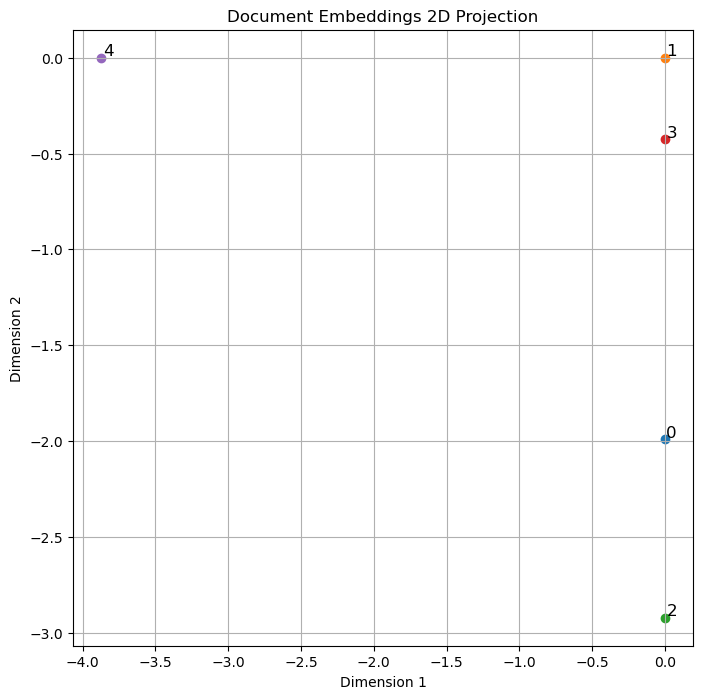

In [49]:
# Create a DataFrame to display Document embeddings
embedding_df = pd.DataFrame(X1.T, index=Word_Document.columns, columns=["Dim1", "Dim2"])
print("\nDocument Embeddings (2D projection):")
print(embedding_df)

# Plot the word embeddings
plt.figure(figsize=(8, 8))
for word, (x, y) in embedding_df.iterrows():
    plt.scatter(x, y)
    plt.text(x + 0.01, y + 0.01, word, fontsize=12)

plt.title("Document Embeddings 2D Projection")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.grid(True)
plt.show()



Word Embeddings (2D projection):
             Dim1          Dim2
accounting    0.0  5.551115e-16
alone         0.0  5.551115e-16
books         0.0  5.551115e-16
boss          0.0  5.551115e-16
box          -1.0  0.000000e+00
cup           0.0 -1.194174e-01
fa            0.0 -1.194174e-01
face          0.0 -1.194174e-01
farrell       0.0 -8.205011e-01
former        0.0  5.551115e-16
future        0.0 -5.590326e-01
gamble        0.0 -1.641002e+00
hands         0.0 -5.590326e-01
home          0.0 -5.590326e-01
in            0.0 -6.784500e-01
left          0.0  5.551115e-16
leicester     0.0 -8.205011e-01
newcastle     0.0 -1.194174e-01
ocean        -2.0  0.000000e+00
of            0.0 -1.379534e+00
office       -1.0  0.000000e+00
premiership   0.0 -1.194174e-01
raids        -1.0  0.000000e+00
risk          0.0 -8.205011e-01
s            -2.0  0.000000e+00
say           0.0 -8.205011e-01
showdown      0.0 -1.194174e-01
systems       0.0 -5.590326e-01
the           0.0 -5.590326e-01
theatr

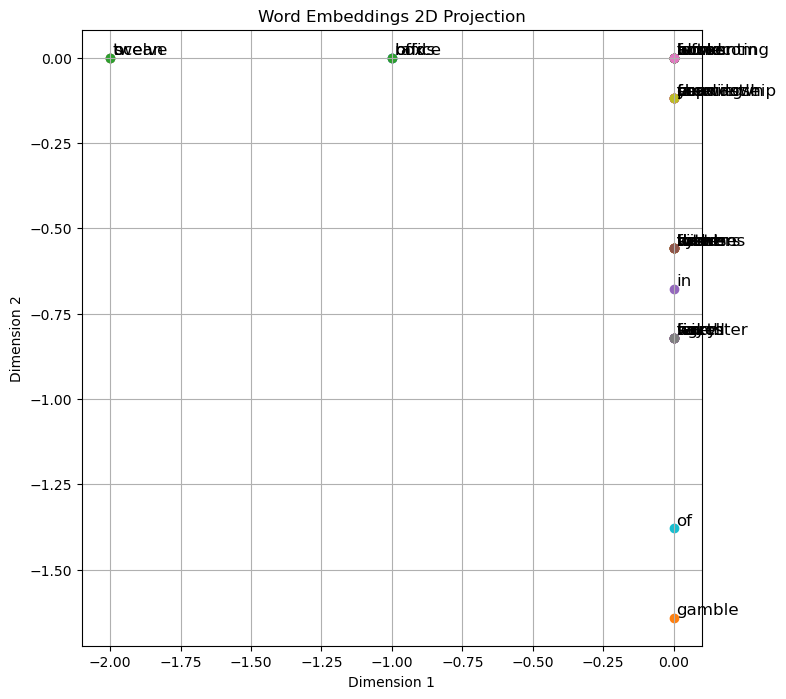

In [46]:
# Create a DataFrame to display word embeddings
embedding_df = pd.DataFrame(X2, index=Word_Document.index, columns=["Dim1", "Dim2"])
print("\nWord Embeddings (2D projection):")
print(embedding_df)

# Plot the word embeddings
plt.figure(figsize=(8, 8))
for word, (x, y) in embedding_df.iterrows():
    plt.scatter(x, y)
    plt.text(x + 0.01, y + 0.01, word, fontsize=12)

plt.title("Word Embeddings 2D Projection")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.grid(True)
plt.show()


In [ ]:
data

In [ ]:
len(data.loc[0,'text'])

In [ ]:
# Create DataFrame
df = pd.DataFrame(data)

# Function to split text into sentences and create new rows
def split_sentences(df):
    new_rows = []

    for _, row in df.iterrows():
        # Split the 'text' column by sentence-ending punctuation (., !, ?)
        sentences = re.split(r'[.!?]+', row['text'])  # Split by punctuation
        sentences = [s.strip() for s in sentences if s.strip()]  # Remove empty strings and leading/trailing spaces

        # Create new rows with the same category for each sentence
        for sentence in sentences:
            new_rows.append({'category': row['category'], 'text': sentence})

    # Create a new DataFrame from the new rows
    return pd.DataFrame(new_rows)

# Apply the function to split sentences
expanded_df = split_sentences(df)

# Show the expanded DataFrame
expanded_df.head()

In [ ]:
len(expanded_df)

In [ ]:
corpus = expanded_df['text']

tokenized_corpus = tokenize_corpus(corpus)

# Build a vocabulary
vocabulary = sorted(set([word for sentence in tokenized_corpus for word in sentence]))
vocab_size = len(vocabulary)
word_to_index = {word: i for i, word in enumerate(vocabulary)}

In [ ]:
len(word_to_index)

In [ ]:
# Count word frequencies
word_freq = defaultdict(int)
for sentence in tokenized_corpus:
    for word in sentence:
        word_freq[word] += 1

In [ ]:
# Filter the vocabulary to include only words that appear more than 10 times
min_freq = 50
vocabulary = sorted([word for word, freq in word_freq.items() if freq >= min_freq])

# Display vocabulary
print(f"Filtered Vocabulary (words with more than {min_freq} occurrences):")
print(len(vocabulary),vocabulary)


In [ ]:
# Create a word to index mapping
vocab_size = len(vocabulary)
word_to_index = {word: i for i, word in enumerate(vocabulary)}

# Create co-occurrence matrix (context window = 1)
co_occurrence_matrix = np.zeros((vocab_size, vocab_size))

# Define a window size
window_size = 3

for sentence in tokenized_corpus:
    for i, word in enumerate(sentence):
        if word in word_to_index:
            word_index = word_to_index[word]
            
            # Look at words before and after the current word within the window
            start = max(0, i - window_size)
            end = min(len(sentence), i + window_size + 1)
            
            for j in range(start, end):
                if i != j and sentence[j] in word_to_index:  # Skip the word itself
                    context_word_index = word_to_index[sentence[j]]
                    co_occurrence_matrix[word_index][context_word_index] += 1

# Display the co-occurrence matrix in DataFrame form
co_occurrence_df = pd.DataFrame(co_occurrence_matrix, index=vocabulary, columns=vocabulary)
print("\nCo-occurrence Matrix:")
co_occurrence_df

In [ ]:
co_occurrence_matrix = np.array(co_occurrence_df)

In [ ]:
# Applying Singular Value Decomposition (SVD) to reduce dimensionality
U, S, V = np.linalg.svd(co_occurrence_matrix)

# Reduce dimensions to 2 for visualization
word_embeddings = U[:, :2]

# Create a DataFrame to display word embeddings
embedding_df = pd.DataFrame(word_embeddings, index=vocabulary, columns=["Dim1", "Dim2"])
print("\nWord Embeddings (2D projection):")
print(embedding_df)

# Plot the word embeddings
plt.figure(figsize=(8, 8))
for word, (x, y) in embedding_df.iterrows():
    plt.scatter(x, y)
    plt.text(x + 0.01, y + 0.01, word, fontsize=12)

plt.title("Word Embeddings 2D Projection")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.grid(True)
plt.show()


In [ ]:
# Tokenize the corpus
def tokenize_corpus(corpus):
    return [sentence.split() for sentence in corpus]

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import wordnet

# Ensure you have downloaded the required resources if not already done
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('averaged_perceptron_tagger')

# Function to check if a word is a noun
def is_noun(pos_tag):
    return pos_tag.startswith('NN')  # NN for singular, NNS for plural nouns

# Function to get wordnet POS tag
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

# Preprocessing: Tokenizing, removing punctuation, lowercasing, stopwords removal, and lemmatization
def tokenize_corpus(corpus):
    stop_words = set(stopwords.words('english'))  # Get stopwords
    lemmatizer = WordNetLemmatizer()  # Initialize lemmatizer
    
    processed_corpus = []
    
    for sentence in corpus:
        # Convert to lowercase
        sentence = sentence.lower()
        
        # Remove punctuation and non-alphabetic characters
        sentence = re.sub(r'[^a-z\s]', '', sentence)
        
        # Tokenize (split the sentence into words)
        words = sentence.split()
        
        # Remove stopwords
        filtered_words = [word for word in words if word not in stop_words]
        
        # POS tagging the filtered words
        pos_tags = pos_tag(filtered_words)
        
        # Keep only nouns and lemmatize them
        processed_sentence = [
            lemmatizer.lemmatize(word, get_wordnet_pos(pos)) 
            for word, pos in pos_tags if is_noun(pos)
        ]
        
        processed_corpus.append(processed_sentence)
    
    return processed_corpus

In [ ]:
corpus = expanded_df['text']

tokenized_corpus = tokenize_corpus(corpus)

# Build a vocabulary
vocabulary = sorted(set([word for sentence in tokenized_corpus for word in sentence]))
vocab_size = len(vocabulary)
word_to_index = {word: i for i, word in enumerate(vocabulary)}

In [ ]:
tokenized_corpus[0]

In [ ]:
len(word_to_index)

In [ ]:
# Count word frequencies
word_freq = defaultdict(int)
for sentence in tokenized_corpus:
    for word in sentence:
        word_freq[word] += 1

In [ ]:
# Filter the vocabulary to include only words that appear more than 10 times
min_freq = 50
vocabulary = sorted([word for word, freq in word_freq.items() if freq >= min_freq])

# Display vocabulary
print(f"Filtered Vocabulary (words with more than {min_freq} occurrences):")
print(len(vocabulary),vocabulary)


In [ ]:
# Create a word to index mapping
vocab_size = len(vocabulary)
word_to_index = {word: i for i, word in enumerate(vocabulary)}

# Create co-occurrence matrix (context window = 1)
co_occurrence_matrix = np.zeros((vocab_size, vocab_size))

# Define a window size
window_size = 3

for sentence in tokenized_corpus:
    for i, word in enumerate(sentence):
        if word in word_to_index:
            word_index = word_to_index[word]
            
            # Look at words before and after the current word within the window
            start = max(0, i - window_size)
            end = min(len(sentence), i + window_size + 1)
            
            for j in range(start, end):
                if i != j and sentence[j] in word_to_index:  # Skip the word itself
                    context_word_index = word_to_index[sentence[j]]
                    co_occurrence_matrix[word_index][context_word_index] += 1

# Display the co-occurrence matrix in DataFrame form
co_occurrence_df = pd.DataFrame(co_occurrence_matrix, index=vocabulary, columns=vocabulary)
print("\nCo-occurrence Matrix:")
co_occurrence_df

In [ ]:
U.shape

In [ ]:
co_occurrence_matrix = np.array(co_occurrence_df)

# Applying Singular Value Decomposition (SVD) to reduce dimensionality
U, S, V = np.linalg.svd(co_occurrence_matrix)

# Reduce dimensions to 2 for visualization
word_embeddings = U[:, :2]

# Create a DataFrame to display word embeddings
embedding_df = pd.DataFrame(word_embeddings, index=vocabulary, columns=["Dim1", "Dim2"])
print("\nWord Embeddings (2D projection):")
print(embedding_df)

# Plot the word embeddings
plt.figure(figsize=(8, 8))
for word, (x, y) in embedding_df.iterrows():
    plt.scatter(x, y)
    plt.text(x + 0.01, y + 0.01, word, fontsize=12)

plt.title("Word Embeddings 2D Projection")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.grid(True)
plt.show()


In [ ]:
word_embeddings_SVD = word_embeddings.copy()

# Word2Vec

**Word2Vec** is one of the most popular algorithms for learning word embeddings (vector representations of words). Developed by researchers at Google, Word2Vec is widely used in Natural Language Processing (NLP) tasks because it captures semantic relationships between words. Instead of treating words as discrete tokens, it represents them as continuous vectors in a multi-dimensional space where semantically similar words are located closer to each other.

## How Word2Vec Works

Word2Vec models learn word representations by predicting words based on their context. It operates under the **Distributional Hypothesis**, which suggests that words that appear in similar contexts tend to have similar meanings.

There are two primary architectures for training Word2Vec models:

1. **Continuous Bag of Words (CBOW)**: In this architecture, the model tries to predict the target word based on the context words surrounding it. It averages the context words' embeddings to predict the target word.
   - Example: In the sentence "the cat sat on the mat," if we want to predict the word "sat," the context could be ["the", "cat", "on", "the", "mat"]. CBOW would use these context words to predict "sat."

2. **Skip-gram**: This architecture does the reverse of CBOW. Given a target word, it predicts the surrounding context words.
   - Example: In the sentence "the cat sat on the mat," given the word "sat," Skip-gram predicts the context words ["the", "cat", "on", "the", "mat"].

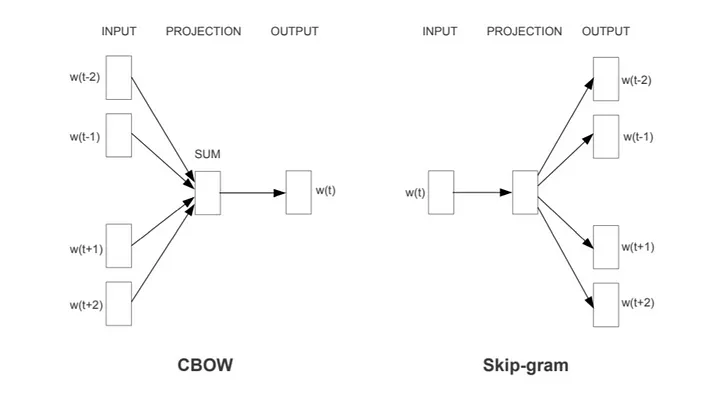


## Learning Process

Both CBOW and Skip-gram use a shallow neural network with one hidden layer. During training, the model adjusts the weights of the network in such a way that the embeddings of similar words (words that appear in similar contexts) become close to each other in vector space.

The output of the training process is a set of vectors (also known as word embeddings), where each word is represented by a point in a multi-dimensional space.

## Mathematical Representation

The **Skip-gram** model can be understood as maximizing the probability of context words given a target word. The objective function (which is maximized during training) can be written as:

$$
\max \prod_{t=1}^{T} \prod_{-c \leq j \leq c, j \neq 0} P(w_{t+j} | w_t)
$$

Where:
- $w_t$ is the target word.
- $w_{t+j}$ are the context words within a window size $c$.
- $T$ is the total number of words in the corpus.

The probability $P(w_{t+j} | w_t)$ is modeled using a softmax function:

$$
P(w_O | w_I) = \frac{\exp({v_O \cdot v_I})}{\sum_{w=1}^{W} \exp({v_w \cdot v_I})}
$$

Where:
- $v_O$ is the vector representation of the output (context) word.
- $v_I$ is the vector representation of the input (target) word.
- $W$ is the size of the vocabulary.

## Benefits of Word2Vec

- **Efficient Training**: Word2Vec can efficiently learn word embeddings from large corpora.
- **Captures Semantic Relationships**: Word2Vec captures not only similarity between words but also analogical relationships (e.g., **king** - **man** + **woman** ≈ **queen**).
- **Low-Dimensional Vectors**: Word embeddings are dense, low-dimensional vectors (typically 100–300 dimensions), making them efficient to store and process.

## Applications of Word2Vec

1. **Word Similarity**: Words with similar meanings are located close to each other in vector space. This can be used in tasks like finding synonyms.
2. **Analogies**: Word2Vec can solve analogy tasks such as "Man is to Woman as King is to Queen" by performing vector arithmetic.
3. **Text Classification**: Embeddings can be used as features for text classification tasks such as sentiment analysis.
4. **Machine Translation**: Embeddings can help in translating words from one language to another by aligning word vectors across languages.

## Limitations of Word2Vec

- **Context Independence**: Word2Vec produces a single vector for each word, regardless of the context in which it appears. It doesn't handle polysemy (e.g., the word "bank" meaning "riverbank" vs. "financial institution").
- **Fixed Vocabulary**: Word2Vec doesn't handle out-of-vocabulary (OOV) words well.

In [ ]:
import numpy as np
from collections import defaultdict

class Word2Vec:
    def __init__(self, corpus, embedding_dim=10, window_size=2, learning_rate=0.01, model_type="skipgram"):
        self.corpus = corpus
        self.tokenized_corpus = [sentence.split() for sentence in corpus]
        self.embedding_dim = embedding_dim
        self.window_size = window_size
        self.learning_rate = learning_rate
        self.model_type = model_type  # "skipgram" or "cbow"
        
        # Build vocabulary
        self.build_vocab()
        
        # Initialize weight matrices
        self.W1 = np.random.rand(self.vocab_size, self.embedding_dim)  # Target word matrix
        self.W2 = np.random.rand(self.embedding_dim, self.vocab_size)  # Context word matrix
        
    def build_vocab(self):
        # Build a vocabulary and map words to indices
        vocabulary = defaultdict(int)
        for sentence in self.tokenized_corpus:
            for word in sentence:
                vocabulary[word] += 1
                
        self.word2idx = {word: i for i, word in enumerate(vocabulary)}
        self.idx2word = {i: word for word, i in self.word2idx.items()}
        self.vocab_size = len(vocabulary)
        
    def one_hot_vector(self, word_index):
        one_hot = np.zeros(self.vocab_size)
        one_hot[word_index] = 1
        return one_hot

    def softmax(self, x):
        e_x = np.exp(x - np.max(x))  # Subtracting max for numerical stability
        return e_x / e_x.sum()
    
    # Generate context-target pairs (for Skip-Gram)
    def generate_skipgram_pairs(self):
        context_pairs = []
        for sentence in self.tokenized_corpus:
            for i, target_word in enumerate(sentence):
                target_word_idx = self.word2idx[target_word]
                context_indices = list(range(max(0, i - self.window_size), min(len(sentence), i + self.window_size + 1)))
                context_indices.remove(i)  # Remove the target word itself
                context_words = [sentence[idx] for idx in context_indices]
                for context_word in context_words:
                    context_word_idx = self.word2idx[context_word]
                    context_pairs.append((target_word_idx, context_word_idx))
        return context_pairs

    # Generate target-context pairs (for CBOW)
    def generate_cbow_pairs(self):
        context_target_pairs = []
        for sentence in self.tokenized_corpus:
            for i, target_word in enumerate(sentence):
                target_word_idx = self.word2idx[target_word]
                context_indices = list(range(max(0, i - self.window_size), min(len(sentence), i + self.window_size + 1)))
                context_indices.remove(i)  # Remove the target word itself
                context_words = [self.word2idx[sentence[idx]] for idx in context_indices]
                context_target_pairs.append((context_words, target_word_idx))
        return context_target_pairs

    # Train Word2Vec model
    def train(self, epochs=100):
        if self.model_type == "skipgram":
            context_pairs = self.generate_skipgram_pairs()
        elif self.model_type == "cbow":
            context_pairs = self.generate_cbow_pairs()

        # Training loop
        for epoch in range(epochs):
            loss_epoch = 0
            if self.model_type == "skipgram":
                for target_word_idx, context_word_idx in context_pairs:
                    loss = self.forward_skipgram(target_word_idx, context_word_idx)
                    loss_epoch += loss
            elif self.model_type == "cbow":
                for context_word_indices, target_word_idx in context_pairs:
                    loss = self.forward_cbow(context_word_indices, target_word_idx)
                    loss_epoch += loss
            
            if epoch % 10 == 0:
                print(f"Epoch {epoch}, Loss: {loss_epoch}")

    def forward_skipgram(self, target_word_idx, context_word_idx):
        # One-hot encoding of the target word
        target_one_hot = self.one_hot_vector(target_word_idx)

        # Forward pass
        h = np.dot(self.W1.T, target_one_hot)  # Hidden layer (shape: [embedding_dim,])
        u = np.dot(self.W2.T, h)               # Output layer (shape: [vocab_size,])
        y_pred = self.softmax(u)               # Predicted context word distribution

        # One-hot encoding of the context word
        context_one_hot = self.one_hot_vector(context_word_idx)

        # Calculate loss (cross-entropy loss)
        loss = -np.log(y_pred[context_word_idx] + 1e-10)  # Cross-entropy loss

        # Backward pass (calculate gradients)
        e = y_pred - context_one_hot  # Error

        # Gradient for W2
        dW2 = np.outer(h, e)  # (embedding_dim, vocab_size)

        # Gradient for W1
        dW1 = np.dot(self.W2, e)  # (embedding_dim,)

        # Update W1 by directly modifying the corresponding row for the target word
        self.W1[target_word_idx, :] -= self.learning_rate * dW1  # Fix: update the target word's row

        # Update W2
        self.W2 -= self.learning_rate * dW2

        return loss
    
    # CBOW forward and backward propagation
    def forward_cbow(self, context_word_indices, target_word_idx):
        # One-hot encoding for context words and target word
        context_one_hots = [self.one_hot_vector(idx) for idx in context_word_indices]
        context_one_hot_sum = np.sum(context_one_hots, axis=0)  # Sum context vectors

        # Forward pass
        h = np.dot(self.W1.T, context_one_hot_sum)  # Hidden layer
        u = np.dot(self.W2.T, h)                   # Output layer (scores for target words)
        y_pred = self.softmax(u)                   # Predicted target word distribution

        # One-hot encoding of actual target word
        target_one_hot = self.one_hot_vector(target_word_idx)

        # Calculate loss (cross-entropy loss)
        loss = -np.sum(target_one_hot * np.log(y_pred + 1e-10))  # Cross-entropy loss

        # Backpropagation
        e = y_pred - target_one_hot  # Error
        dW2 = np.outer(h, e)          # Gradient for W2
        dW1 = np.dot(self.W2, e).reshape(-1, 1) * context_one_hot_sum.reshape(-1, 1)  # Gradient for W1

        # Update weights
        self.W1 -= self.learning_rate * dW1
        self.W2 -= self.learning_rate * dW2

        return loss

# Create Word2Vec object (Skip-Gram model)
word2vec_model = Word2Vec(corpus, embedding_dim=10, window_size=2, model_type="skipgram")

# Train the model
word2vec_model.train(epochs=100)


In [ ]:
!pip install gensim

In [ ]:
import gensim
from gensim.models import Word2Vec

# Train Word2Vec model using gensim
gensim_model = Word2Vec(sentences=tokenized_corpus, vector_size=10, window=2, min_count=1, sg=1)  # Skip-gram model


In [ ]:
# Get the word vector for 'cat'
cat_vector_gensim = gensim_model.wv['cat']
print("Gensim Word Vector for 'cat':\n", cat_vector_gensim)

# Get the most similar words to 'cat'
similar_words_gensim = gensim_model.wv.most_similar('cat')
print("\nWords most similar to 'cat' using gensim Word2Vec:\n", similar_words_gensim)


In [ ]:
# Custom word vector for 'cat'
cat_index = word2idx['cat']
cat_vector_custom = W1[cat_index]
print("Custom Word Vector for 'cat':\n", cat_vector_custom)


In [ ]:
# Custom cosine similarity function
def cosine_similarity(vec1, vec2):
    dot_product = np.dot(vec1, vec2)
    norm_vec1 = np.linalg.norm(vec1)
    norm_vec2 = np.linalg.norm(vec2)
    return dot_product / (norm_vec1 * norm_vec2)

# Comparing similarity of 'cat' and 'dog' in custom implementation
dog_index = word2idx['dog']
dog_vector_custom = W1[dog_index]
sim_custom = cosine_similarity(cat_vector_custom, dog_vector_custom)
print("\nCustom Cosine Similarity between 'cat' and 'dog':", sim_custom)

# Comparing similarity of 'cat' and 'dog' using gensim
sim_gensim = gensim_model.wv.similarity('cat', 'dog')
print("Gensim Cosine Similarity between 'cat' and 'dog':", sim_gensim)

In [ ]:
W1.shape

In [ ]:
# Reduce dimensions to 2 for visualization
word_embeddings = W1.copy()

# Create a DataFrame to display word embeddings
embedding_df = pd.DataFrame(word_embeddings, index=vocabulary, columns=["Dim1", "Dim2"])
print("\nWord Embeddings (2D projection):")
print(embedding_df)

# Plot the word embeddings
plt.figure(figsize=(8, 8))
for word, (x, y) in embedding_df.iterrows():
    plt.scatter(x, y)
    plt.text(x + 0.01, y + 0.01, word, fontsize=12)

plt.title("Word Embeddings 2D Projection")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.grid(True)
plt.show()
